<h4> Import libraries

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

<h4> import data

In [3]:
df = pd.read_csv(r"C:\Users\ioi\Desktop\kaggle\california housing\housing.csv")

<h4> inspect the data

In [6]:
df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [7]:
df.shape

(20640, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<h4> Exploration

In [14]:
df.describe()["median_house_value"]

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [18]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    width=600,  # Width of map
    height=600,  # Height of map
    color="median_house_value",
    hover_data=["median_house_value"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [19]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="longitude",
    y="latitude",
    z="median_house_value",
    labels={"lon": "longitude", "lat": "latitude", "median_house_value": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [21]:
df.select_dtypes("object").head(10)

ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
6        NEAR BAY
7        NEAR BAY
8        NEAR BAY
9        NEAR BAY

In [22]:
df.select_dtypes("object").nunique()

ocean_proximity    5
dtype: int64

In [23]:
df.select_dtypes("object").tail(10)

ocean_proximity
20630          INLAND
20631          INLAND
20632          INLAND
20633          INLAND
20634          INLAND
20635          INLAND
20636          INLAND
20637          INLAND
20638          INLAND
20639          INLAND

<Axes: >

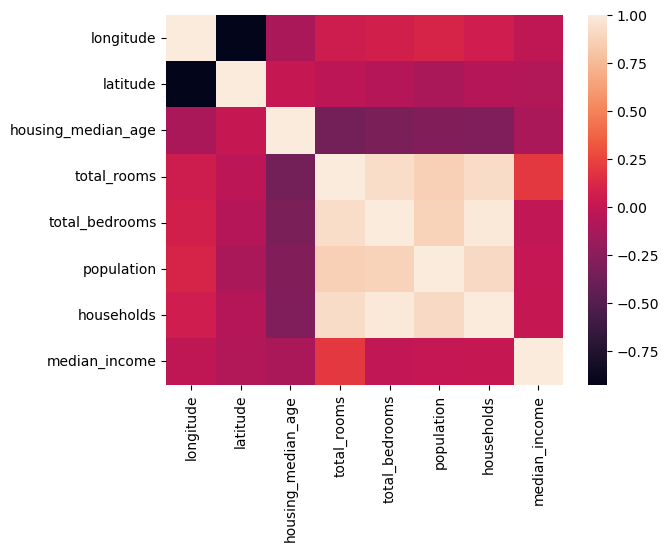

In [24]:
corr = df.select_dtypes("number").drop(columns="median_house_value").corr()
sns.heatmap(corr)

<h4> Split data

In [28]:
target = "median_house_value"
features =  [col for col in df.columns if col not in target]
y = df[target]
X = df[features]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4> Build the model

In [32]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['ocean_proximity'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

<h4> make predictions

In [33]:
y_pred_training = model.predict(X_train)

In [34]:
y_pred_test = model.predict(X_test)

<h4> model evaluation

In [36]:
model_train_mse = mean_squared_error(y_train, y_pred_training)
model_train_r2 = r2_score(y_train, y_pred_training)


model_test_mse = mean_squared_error(y_test, y_pred_test)
model_test_r2 = r2_score(y_test, y_pred_test)

In [37]:
model_train_mse

4690511174.839978

In [38]:
model_train_r2

0.6456482397646103

In [39]:
model_test_mse

4802173538.604167

In [40]:
model_test_r2

0.6488402154431988

<h4> Random forest model

In [51]:
# Build Model
rf_model = make_pipeline(
    OneHotEncoder(), RandomForestRegressor(max_depth=10, random_state=42)

)
# Fit model to training data
rf_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['ocean_proximity'])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [52]:
y_pred_training_rf = rf_model.predict(X_train)

In [53]:
y_pred_test_rf = rf_model.predict(X_test)

<h3> evaluation

In [54]:
rf_model_train_mse = mean_squared_error(y_train, y_pred_training_rf)
rf_model_train_r2 = r2_score(y_train, y_pred_training_rf)


model_test_mse = mean_squared_error(y_test, y_pred_test_rf)
model_test_r2 = r2_score(y_test, y_pred_test_rf)

In [55]:
rf_model_train_mse

1862386458.1609707

In [56]:
rf_model_train_r2

0.8593031985025795

In [57]:
model_test_mse

2921134688.586746

In [58]:
model_test_r2

0.7863915121643683